<script src="https://kit.fontawesome.com/d481cf1ff3.js" crossorigin="anonymous"></script>

<br>
<img src="https://drive.google.com/uc?export=view&id=1nmL3E8OmZgB2qjKixlJprVuTxlox3O07" width="85" height="85">
<br>
***
# COVID-19 DATA

<div><table style="width:600px; color:#ff0000;" align="left">
    <tr>
    <td style="width:100px; text-align:center; background-color:#edeeef; padding:0"><i class="fa fa-heartbeat fa-5x" aria-hidden="true"></i></td>
    <td style="text-align:left; background-color:#ffffff; padding:0">
    <div class="alert alert-block alert-danger">
    <b>Steps:</b>
        <ul class="fa-ul">
          <li><i class="fa-li fa fa-square"></i>Pull in data from data.world Website</li>
          <li><i class="fa-li fa fa-square"></i>Put it into Pandas and have fun</li>
        </ul>
    </div>
    </td>
    
</tr>
</table></div>
<br><br><br><br><br><br>

> * data.world source stopped updating on June 4, 2020
<i class="fas fa-virus"></i>

In [2]:
import pandas as pd
import numpy as np
import time

import seaborn as sb
import matplotlib.pyplot as plt

from pylab import rcParams

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [4]:
url = 'https://query.data.world/s/oovglts3s5iol734726yb3pfshnd3n'
tic = time.perf_counter()
covid_df = pd.read_csv(url)
toc = time.perf_counter()

print(f"Downloaded the data in {(toc - tic)/60:0.4f} minutes")

C:\Users\Chester Qualls\AppData\Local\Temp\ipykernel_9340\2712030411.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_df = pd.read_csv(url)


Downloaded the data in 0.1946 minutes


In [5]:
#Convert the date fields to a date format.
tic = time.perf_counter()  

covid_df['Date'] = pd.to_datetime(covid_df['Date'])
#covid_df['Prep_Flow_Runtime'] = pd.to_datetime(covid_df['Prep_Flow_Runtime'])

#covid_df['Population_Count'] = covid_df['Population_Count'].fillna(0)
#covid_df['Population_Count'] = covid_df['Population_Count'].astype(object)

toc = time.perf_counter()

print(f"Converted the data in {(toc - tic)/60:0.2f} minutes")
#print('Elaspsed time in minutes',(toc - tic)/60)
print('***********************************')    
covid_df.info()

Converted the data in 0.01 minutes
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950670 entries, 0 to 950669
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Case_Type                             950670 non-null  object        
 1   People_Total_Tested_Count             6048 non-null    float64       
 2   Cases                                 950670 non-null  int64         
 3   Difference                            950670 non-null  int64         
 4   Date                                  950670 non-null  datetime64[ns]
 5   Combined_Key                          950670 non-null  object        
 6   Country_Region                        950670 non-null  object        
 7   Province_State                        901260 non-null  object        
 8   Admin2                                878580 non-null  object  

In [6]:
#Do a little math
covid_df['100k_quotient'] = covid_df['Population_Count']/100000
covid_df['per_ht'] = covid_df['Difference']/covid_df['100k_quotient']#May not need the 100k stuff here, but it is used in a few places

covid_df['Lat2'] = covid_df['Lat'].round(0)

print ('Done')

Done


In [8]:
# covid_df.to_csv("c:/Users/Chester Qualls/Desktop/Customers/Am Tech/data-world-covid-19-2020-11-24.csv")

In [9]:
#print("Table Names", covid_df['Table_Names'].unique())
print("Case Type", covid_df['Case_Type'].unique())


Case Type ['Confirmed' 'Deaths']


In [10]:
print("Arizona Counties", covid_df.loc[(covid_df['Province_State'] == 'Arizona', 'Admin2')].unique())

Arizona Counties ['Yuma' 'Navajo' 'Pinal' 'La Paz' 'Mohave' 'Coconino' 'Santa Cruz'
 'Maricopa' 'Gila' 'Yavapai' 'Out of AZ' 'Apache' 'Graham' 'Cochise'
 'Pima' 'Unassigned' 'Greenlee']


In [11]:
covid_df.groupby(['Country_Region','Province_State'], as_index=False)['Population_Count','per_ht'].mean().sort_values('Country_Region')

C:\Users\Chester Qualls\AppData\Local\Temp\ipykernel_9340\667332994.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_df.groupby(['Country_Region','Province_State'], as_index=False)['Population_Count','per_ht'].mean().sort_values('Country_Region')


,Country_Region,Province_State,Population_Count,per_ht
0,Australia,Australian Capital Territory,4.281000e+05,0.095166
1,Australia,New South Wales,8.118000e+06,0.144079
2,Australia,Northern Territory,2.456000e+05,0.043733
3,Australia,Queensland,5.115500e+06,0.077180
4,Australia,South Australia,1.756500e+06,0.093621
5,Australia,Tasmania,5.355000e+05,0.166684
6,Australia,Victoria,6.629900e+06,0.094968
7,Australia,Western Australia,2.630600e+06,0.084617
19,Canada,Yukon,4.107800e+04,0.099179
18,Canada,Saskatchewan,1.181666e+06,0.206551


In [12]:
covid_df.groupby(['Lat2','Case_Type'], as_index=False)['Difference','per_ht'].sum().sort_values('Lat2')

C:\Users\Chester Qualls\AppData\Local\Temp\ipykernel_9340\882341486.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_df.groupby(['Lat2','Case_Type'], as_index=False)['Difference','per_ht'].sum().sort_values('Lat2')


,Lat2,Case_Type,Difference,per_ht
0,-52.0,Confirmed,13,373.241459
1,-52.0,Deaths,0,0.000000
2,-43.0,Confirmed,228,42.577031
3,-43.0,Deaths,13,2.427638
4,-41.0,Confirmed,1504,31.188870
5,-41.0,Deaths,22,0.456220
6,-38.0,Confirmed,21878,70.042635
7,-38.0,Deaths,627,1.631839
8,-36.0,Confirmed,118292,618.804701
9,-36.0,Deaths,1356,7.093457


In [13]:
print("Country Region", covid_df['Country_Region'].unique())

Country Region ['Western Sahara' 'Switzerland' 'Cyprus' 'Antigua and Barbuda' 'Thailand'
 'Jamaica' 'Belize' 'Central African Republic' 'Grenada' 'Greece'
 'Netherlands' 'United Kingdom' 'France' 'Poland' 'Canada' 'China'
 'Kazakhstan' 'South Sudan' 'Bangladesh' 'Croatia' 'Chad' 'Hungary'
 'Sudan' 'Singapore' 'Bulgaria' 'Saint Lucia' 'Kuwait' 'Peru' 'Nepal'
 'United Arab Emirates' 'Sierra Leone' 'Brazil' 'Liechtenstein' 'Pakistan'
 'Maldives' 'Equatorial Guinea' 'Azerbaijan' 'Bahrain' 'Kenya'
 'Cabo Verde' 'Germany' 'Malta' 'Togo' 'Montenegro' 'North Macedonia'
 'Belarus' 'Tunisia' 'Congo (Brazzaville)' 'Dominica' 'Nicaragua'
 'Austria' 'Paraguay' 'Cuba' 'Jordan' 'Mali' 'Afghanistan' 'Angola'
 'Uruguay' 'Yemen' 'Iraq' 'Brunei' 'Holy See' 'Congo (Kinshasa)'
 'Australia' 'Bolivia' 'Somalia' 'Botswana' 'New Zealand' 'Uganda'
 'Barbados' 'Djibouti' 'Norway' 'Kyrgyzstan' 'Sri Lanka' 'Syria' 'Georgia'
 'Timor-Leste' 'El Salvador' 'Mauritius' 'Oman' 'Senegal' 'Bahamas'
 'Rwanda' 'Mozambique' 

In [14]:
# I previously created a variable covid_sum for this but don't really need to keep that in memory.

pd.pivot_table(covid_df.loc[(covid_df['Province_State'] == 'Arizona')|(covid_df['Province_State'] == 'New Mexico')],
                           values=['Cases'], index=['Province_State','Admin2'], 
                           columns=['Case_Type'], aggfunc='max')

Cases       
Case_Type                 Confirmed Deaths
Province_State Admin2                     
Arizona        Apache          1637     45
               Cochise          105      5
               Coconino        1221     85
               Gila              39      1
               Graham            41      1
               Greenlee           8      0
               La Paz           110      1
               Maricopa       11229    471
               Mohave           428     49
               Navajo          2042     67
               Out of AZ          0      0
               Pima            2669    202
               Pinal            948     40
               Santa Cruz       462      0
               Unassigned         0     42
               Yavapai          307      7
               Yuma            1643     23
New Mexico     Bernalillo      1543     73
               Catron             2      1
               Chaves            51      2
               Cibola           148      6
               Colfax             5      0
               Curry             57      0
               De Baca            1      0
               Dona Ana         509      3
               Eddy              26      1
               Grant             16      0
               Guadalupe         20      0
               Harding            1      0
               Hidalgo            1      0
               Lea               26      0
               Lincoln            5      0
               Los Alamos         6      0
               Luna              10      1
               McKinley        2542    124
               Mora               0      0
               Otero             23      3
               Out of NM          0      0
               Quay               5      1
               Rio Arriba        52      1
               Roosevelt         42      0
               San Juan        1842    129
               San Miguel        15      0
               Sandoval         578     27
               Santa Fe         150      3
               Sierra             1      0
               Socorro           54      5
               Taos              31      0
               Torrance          33      1
               Unassigned       477      6
               Union              4      0
               Valencia          80      2

In [15]:
country_name = 'US'
state_name = 'Arizona'
county_name = 'Maricopa'

In [16]:
covid_df.loc[(covid_df['Province_State'] == state_name) & (covid_df['Admin2'] == county_name)].sort_values(by=['Date'])

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,...,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,100k_quotient,per_ht,Lat2
920665,Confirmed,NaN,0,0,2020-01-22,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.000000,33.0
906209,Deaths,NaN,0,0,2020-01-22,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.000000,33.0
741952,Deaths,NaN,0,0,2020-01-23,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.000000,33.0
365110,Confirmed,NaN,0,0,2020-01-23,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.000000,33.0
146866,Confirmed,NaN,0,0,2020-01-24,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.000000,33.0
401160,Deaths,NaN,0,0,2020-01-24,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.000000,33.0
542125,Confirmed,NaN,0,0,2020-01-25,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.000000,33.0
788567,Deaths,NaN,0,0,2020-01-25,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.000000,33.0
554420,Confirmed,NaN,1,1,2020-01-26,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.022294,33.0
100730,Deaths,NaN,0,0,2020-01-26,"Maricopa, Arizona, US",US,Arizona,Maricopa,US,...,4013.0,33.348359,-112.491815,4485414.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,44.85414,0.000000,33.0


In [17]:
# previously created a variable called c19_stats but not needed

covid_df.dropna(subset=['People_Hospitalized_Cumulative_Count', 'People_Total_Tested_Count']).loc[(covid_df['Province_State'] == state_name) & (covid_df['Case_Type'] == 'Confirmed')].sort_values(by=['Date','Case_Type'], ascending=True)

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,...,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,100k_quotient,per_ht,Lat2
332522,Confirmed,42109.0,0,0,2020-04-12,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,0.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN
473925,Confirmed,43347.0,0,0,2020-04-13,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,525.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN
345494,Confirmed,44096.0,0,0,2020-04-14,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,580.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN
177166,Confirmed,45310.0,0,0,2020-04-15,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,590.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN
788320,Confirmed,47398.0,0,0,2020-04-16,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,578.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN
359370,Confirmed,49230.0,0,0,2020-04-17,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,566.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN
222411,Confirmed,51045.0,0,0,2020-04-18,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,566.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN
547559,Confirmed,52990.0,0,0,2020-04-19,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,631.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN
595735,Confirmed,54500.0,0,0,2020-04-20,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,637.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN
607804,Confirmed,55152.0,0,0,2020-04-21,"Unassigned, Arizona, US",US,Arizona,Unassigned,US,...,NaN,NaN,NaN,NaN,637.0,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,NaN,NaN,NaN


In [18]:
#Previously had variable called covid_timeline, but was not necessary

print('***Data for', state_name,'/', county_name,'***')
covid_df.loc[(covid_df['Province_State'] == 'Arizona') & (covid_df['Admin2'] == 'Maricopa')].groupby(['Date','Case_Type','Cases'],
                    as_index=False).agg({'Difference': ['sum']}).rename(columns={'Case_Type':'Type','Cases':'Total', 'Difference':'Daily','sum':''}, inplace=False)


***Data for Arizona / Maricopa ***


,Date,Type,Total,Daily
,,,,
0,2020-01-22,Confirmed,0,0
1,2020-01-22,Deaths,0,0
2,2020-01-23,Confirmed,0,0
3,2020-01-23,Deaths,0,0
4,2020-01-24,Confirmed,0,0
5,2020-01-24,Deaths,0,0
6,2020-01-25,Confirmed,0,0
7,2020-01-25,Deaths,0,0
8,2020-01-26,Confirmed,1,1


In [19]:
#Check for accurate
#Previously had variable called covid_bycountry, but was not necessary
pd.pivot_table((covid_df),
                           values=['Difference'], index=['Country_Region'], 
                           columns=['Case_Type'], aggfunc='sum')

Difference        
Case_Type                         Confirmed  Deaths
Country_Region                                     
Afghanistan                           18054     300
Albania                                1197      33
Algeria                                9831     681
Andorra                                 852      51
Angola                                   86       4
Antigua and Barbuda                      26       3
Argentina                             20197     608
Armenia                               11221     176
Australia                              7247     102
Austria                               16805     670
Azerbaijan                             6522      78
Bahamas                                 102      11
Bahrain                               13296      21
Bangladesh                            57563     781
Barbados                                 92       7
Belarus                               45981     253
Belgium                               58767    9548
Belize                                   18       2
Benin                                   261       3
Bhutan                                   47       0
Bolivia                               12245     415
Bosnia and Herzegovina                 2594     159
Botswana                                 40       1
Brazil                               614941   34021
Brunei                                  141       2
Bulgaria                               2585     147
Burkina Faso                            885      53
Burma                                   236       6
Burundi                                  63       1
Cabo Verde                              502       5
Cambodia                                125       0
Cameroon                               6789     203
Canada                                95256    7716
Central African Republic               1288       4
Chad                                    828      66
Chile                                118292    1356
China                                 84171    4638
Colombia                              33466    1099
Comoros                                 132       2
Congo (Brazzaville)                     611      20
Congo (Kinshasa)                       3644      78
Costa Rica                             1194      10
Cote d'Ivoire                          3262      35
Croatia                                2247     103
Cruise Ship                             734      16
Cuba                                   2119      83
Cyprus                                  958      17
Czechia                                9494     326
Denmark                               12011     582
Djibouti                               4054      26
Dominica                                 18       0
Dominican Republic                    18319     520
Ecuador                               40966    3486
Egypt                                 29767    1126
El Salvador                            2781      52
Equatorial Guinea                      1306      12
Eritrea                                  39       0
Estonia                                1890      69
Eswatini                                300       3
Ethiopia                               1636      18
Fiji                                     18       0
Finland                                6911     322
France                               189569   29068
Gabon                                  2955      21
Gambia                                   26       1
Georgia                                 801      13
Germany                              184472    8635
Ghana                                  8885      38
Greece                                 2952     180
Grenada                                  23       0
Guatemala                              6154     158
Guinea                                 3991      23
Guinea-Bissau                          1339       8
Guyana                                  153      12
Haiti                        

In [20]:
covid_df.groupby(['Country_Region','Case_Type']).agg({'Difference': ['sum'],
                                                      'per_ht': ['sum']})


Difference        per_ht
                                                  sum           sum
Country_Region                   Case_Type                         
Afghanistan                      Confirmed      18054  4.637752e+01
                                 Deaths           300  7.706468e-01
Albania                          Confirmed       1197  4.159427e+01
                                 Deaths            33  1.146709e+00
Algeria                          Confirmed       9831  2.241908e+01
                                 Deaths           681  1.552985e+00
Andorra                          Confirmed        852  1.102699e+03
                                 Deaths            51  6.600660e+01
Angola                           Confirmed         86  2.616665e-01
                                 Deaths             4  1.217053e-02
Antigua and Barbuda              Confirmed         26  2.655012e+01
                                 Deaths             3  3.063475e+00
Argentina                        Confirmed      20197  4.468780e+01
                                 Deaths           608  1.345258e+00
Armenia                          Confirmed      11221  3.786741e+02
                                 Deaths           176  5.939457e+00
Australia                        Confirmed       7247  2.113193e+02
                                 Deaths           102  4.693411e+00
Austria                          Confirmed      16805  1.865895e+02
                                 Deaths           670  7.439154e+00
Azerbaijan                       Confirmed       6522  6.432476e+01
                                 Deaths            78  7.692934e-01
Bahamas                          Confirmed        102  2.593783e+01
                                 Deaths            11  2.797217e+00
Bahrain                          Confirmed      13296  7.813900e+02
                                 Deaths            21  1.234145e+00
Bangladesh                       Confirmed      57563  3.495247e+01
                                 Deaths           781  4.742261e-01
Barbados                         Confirmed         92  3.201436e+01
                                 Deaths             7  2.435876e+00
Belarus                          Confirmed      45981  4.866064e+02
                                 Deaths           253  2.677441e+00
Belgium                          Confirmed      58767  5.070660e+02
                                 Deaths          9548  8.238409e+01
Belize                           Confirmed         18  4.526924e+00
                                 Deaths             2  5.029915e-01
Benin                            Confirmed        261  2.152897e+00
                                 Deaths             3  2.474595e-02
Bhutan                           Confirmed         47  6.091144e+00
                                 Deaths             0  0.000000e+00
Bolivia                          Confirmed      12245  1.048999e+02
                                 Deaths           415  3.555204e+00
Bosnia and Herzegovina           Confirmed       2594  7.906572e+01
                                 Deaths           159  4.846357e+00
Botswana                         Confirmed         40  1.700951e+00
                                 Deaths             1  4.252379e-02
Brazil                           Confirmed     614941  2.893031e+02
                                 Deaths         34021  1.600541e+01
Brunei                           Confirmed        141  3.222982e+01
                                 Deaths             2  4.571606e-01
Bulgaria                         Confirmed       2585  3.720257e+01
                                 Deaths           147  2.115581e+00
Burkina Faso                     Confirmed        885  4.233786e+00
                                 Deaths            53  2.535487e-01
Burma                            Confirmed        236  4.337454e-01
                                 Deaths             6  1.102743e-02
Burundi                        

Text(0, 0.5, 'MEAN DIFFERENCE EACH DAY')

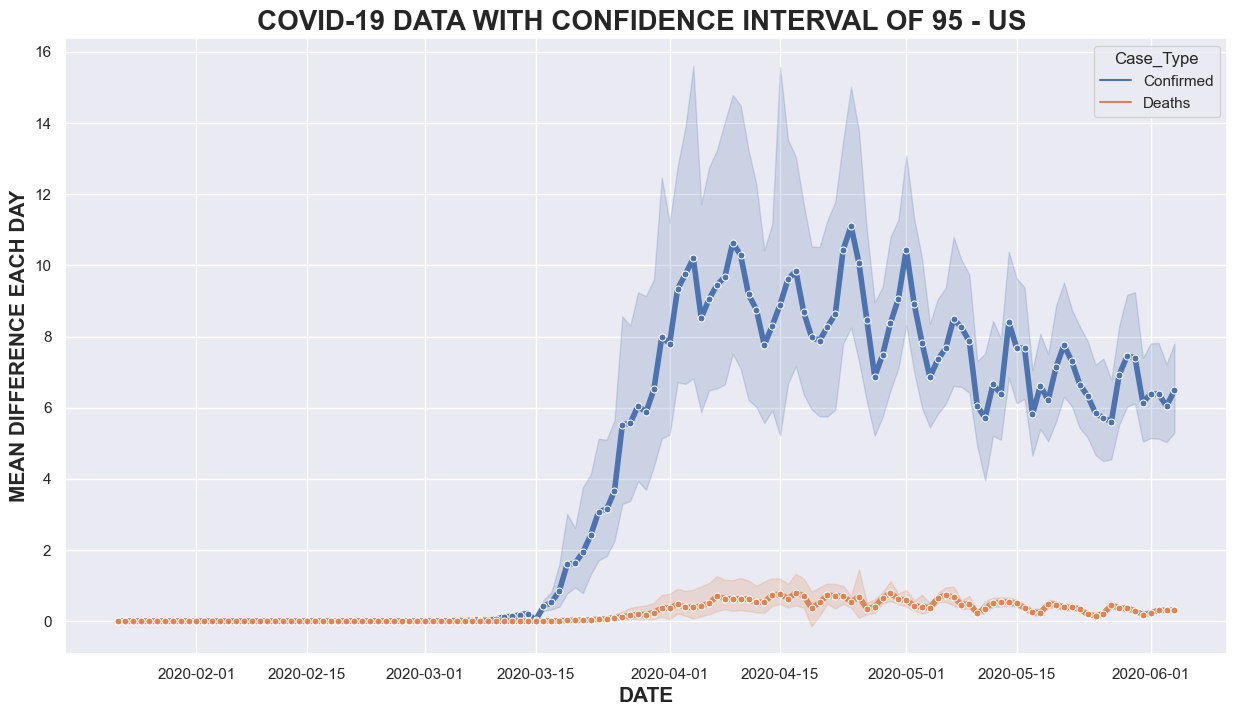

In [24]:
covid_bydate = covid_df.loc[(covid_df['Country_Region'] == country_name)
         & (covid_df['Date'] >= '1/22/2020')]

#Begin Graph
rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_bydate)

ax.set_title(f"COVID-19 DATA WITH CONFIDENCE INTERVAL OF 95 - {country_name} ",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xticklabels('Date', rotation = 45)
ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
ax.set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)

In [22]:
# del covid_bydate

In [25]:
#covid_bydate[['Date','People_Hospitalized_Cumulative_Count']].dropna(axis=0).sort_values(by=['Date'])
covid_bydate[['Date','Province_State','People_Hospitalized_Cumulative_Count']].sort_values(by=['Date']).loc[(covid_df['People_Hospitalized_Cumulative_Count'] > 0) & (covid_df['Province_State'] == state_name)]

,Date,Province_State,People_Hospitalized_Cumulative_Count
473925,2020-04-13,Arizona,525.0
631213,2020-04-13,Arizona,525.0
600738,2020-04-14,Arizona,580.0
345494,2020-04-14,Arizona,580.0
177166,2020-04-15,Arizona,590.0
567835,2020-04-15,Arizona,590.0
788320,2020-04-16,Arizona,578.0
758004,2020-04-16,Arizona,578.0
777069,2020-04-17,Arizona,566.0
359370,2020-04-17,Arizona,566.0


In [25]:
# This variable is used in the next few graphs but created in place when needed so can clean this out of memory whenever.
# del covid_state

Text(0, 0.5, 'MEAN DIFFERENCE EACH DAY')

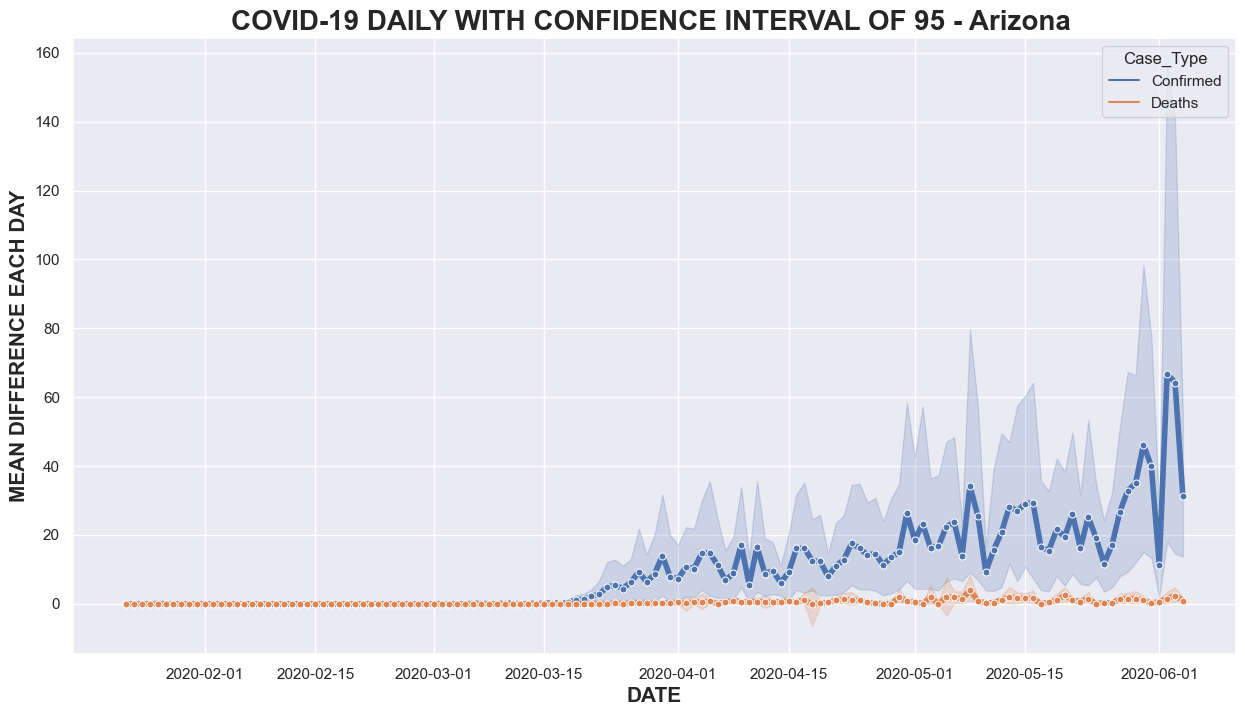

In [26]:
covid_state = covid_df.loc[(covid_df['Province_State'] == state_name)]

rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_state)

ax.set_title(f"COVID-19 DAILY WITH CONFIDENCE INTERVAL OF 95 - {state_name} ",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xticklabels('Date', rotation = 45)
ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
ax.set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)

C:\Users\Chester Qualls\AppData\Local\Temp\ipykernel_9340\774377522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_state['date_delta'] = (covid_state['Date'] - covid_state['Date'].min())  / np.timedelta64(1,'D')


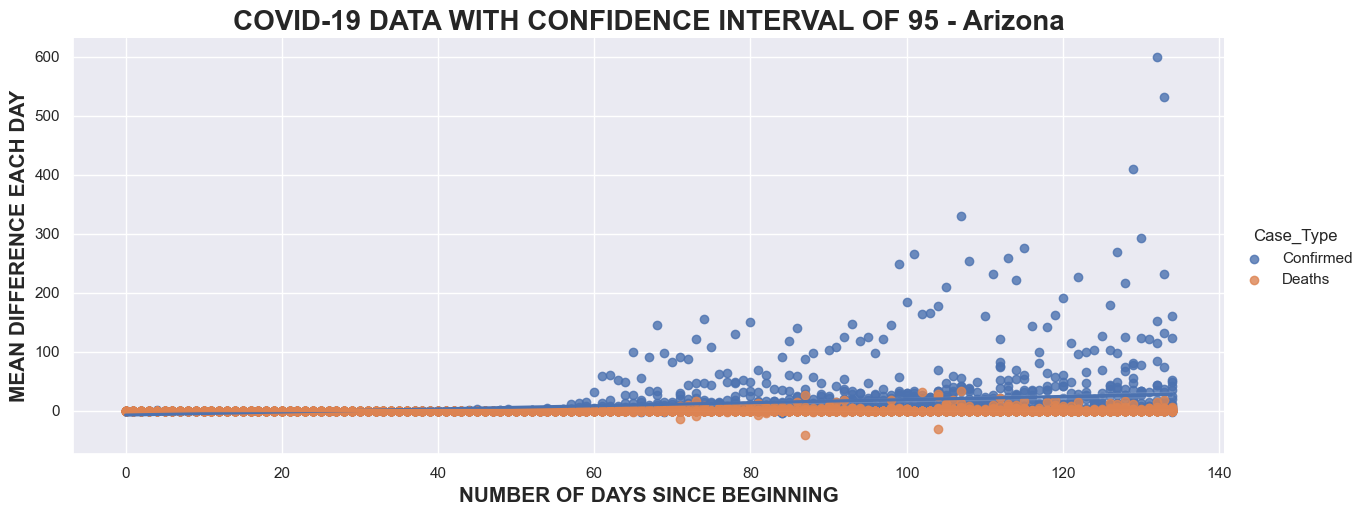

In [27]:
covid_state = covid_df.loc[(covid_df['Province_State'] == state_name)]

covid_state['date_delta'] = (covid_state['Date'] - covid_state['Date'].min())  / np.timedelta64(1,'D')

rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
#ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_state)
ax = sb.lmplot(y=('Difference'), x='date_delta', hue='Case_Type', hue_order=('Confirmed','Deaths'), ci=95 ,aspect=2.5, data=covid_state)


#ax.set_title(f"COVID-19 DATA WITH CONFIDENCE INTERVAL OF 95 - {state_name}/{county_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
#ax.set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)

axes = ax.axes.flatten()
axes[0].set_title(f"COVID-19 DATA WITH CONFIDENCE INTERVAL OF 95 - {state_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
axes[0].set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)
for ax in axes:
    ax.set_xlabel('NUMBER OF DAYS SINCE BEGINNING',fontweight='bold',fontsize=15)
    


C:\Users\Chester Qualls\AppData\Local\Temp\ipykernel_9340\1961936349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_state['date_delta'] = (covid_state['Date'] - covid_state['Date'].min())  / np.timedelta64(1,'D')


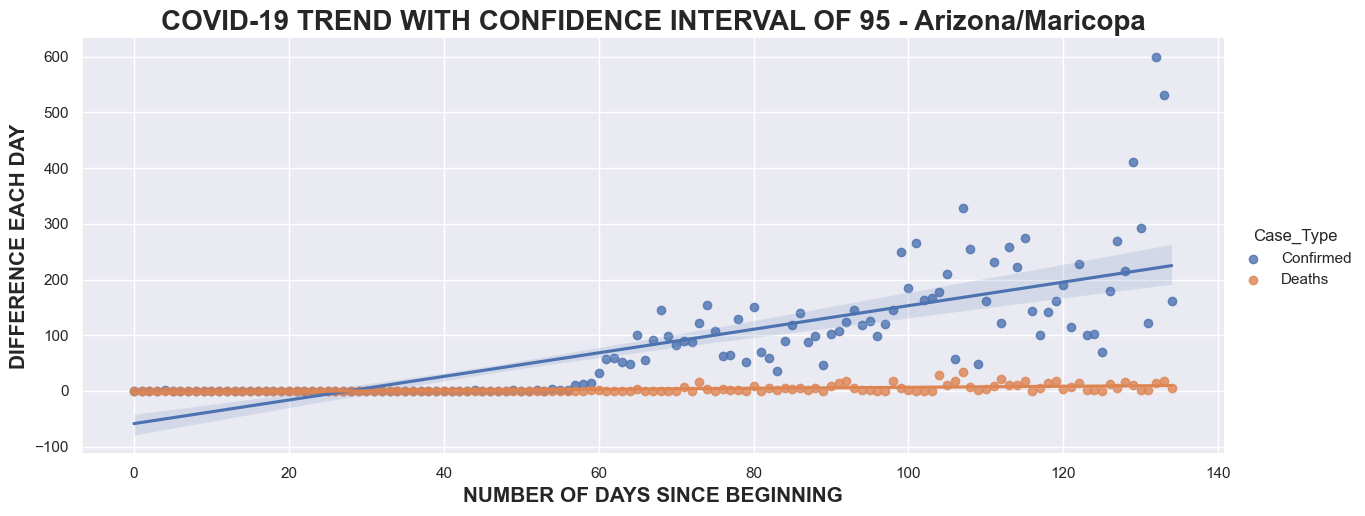

In [28]:
covid_state = covid_df.loc[(covid_df['Province_State'] == state_name)
                          & (covid_df['Admin2']== county_name)]

covid_state['date_delta'] = (covid_state['Date'] - covid_state['Date'].min())  / np.timedelta64(1,'D')

rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
#ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_state)
ax = sb.lmplot(y=('Difference'), x='date_delta', hue='Case_Type', hue_order=('Confirmed','Deaths'), ci=95 ,aspect=2.5, data=covid_state)


#ax.set_title(f"COVID-19 DATA WITH CONFIDENCE INTERVAL OF 95 - {state_name}/{county_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
#ax.set_ylabel('MEAN DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)

axes = ax.axes.flatten()
axes[0].set_title(f"COVID-19 TREND WITH CONFIDENCE INTERVAL OF 95 - {state_name}/{county_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
axes[0].set_ylabel('DIFFERENCE EACH DAY',fontweight='bold',fontsize=15)
for ax in axes:
    ax.set_xlabel('NUMBER OF DAYS SINCE BEGINNING',fontweight='bold',fontsize=15)

C:\Users\Chester Qualls\AppData\Local\Temp\ipykernel_9340\1304938939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_state['date_delta'] = (covid_state['Date'] - covid_state['Date'].min())  / np.timedelta64(1,'D')


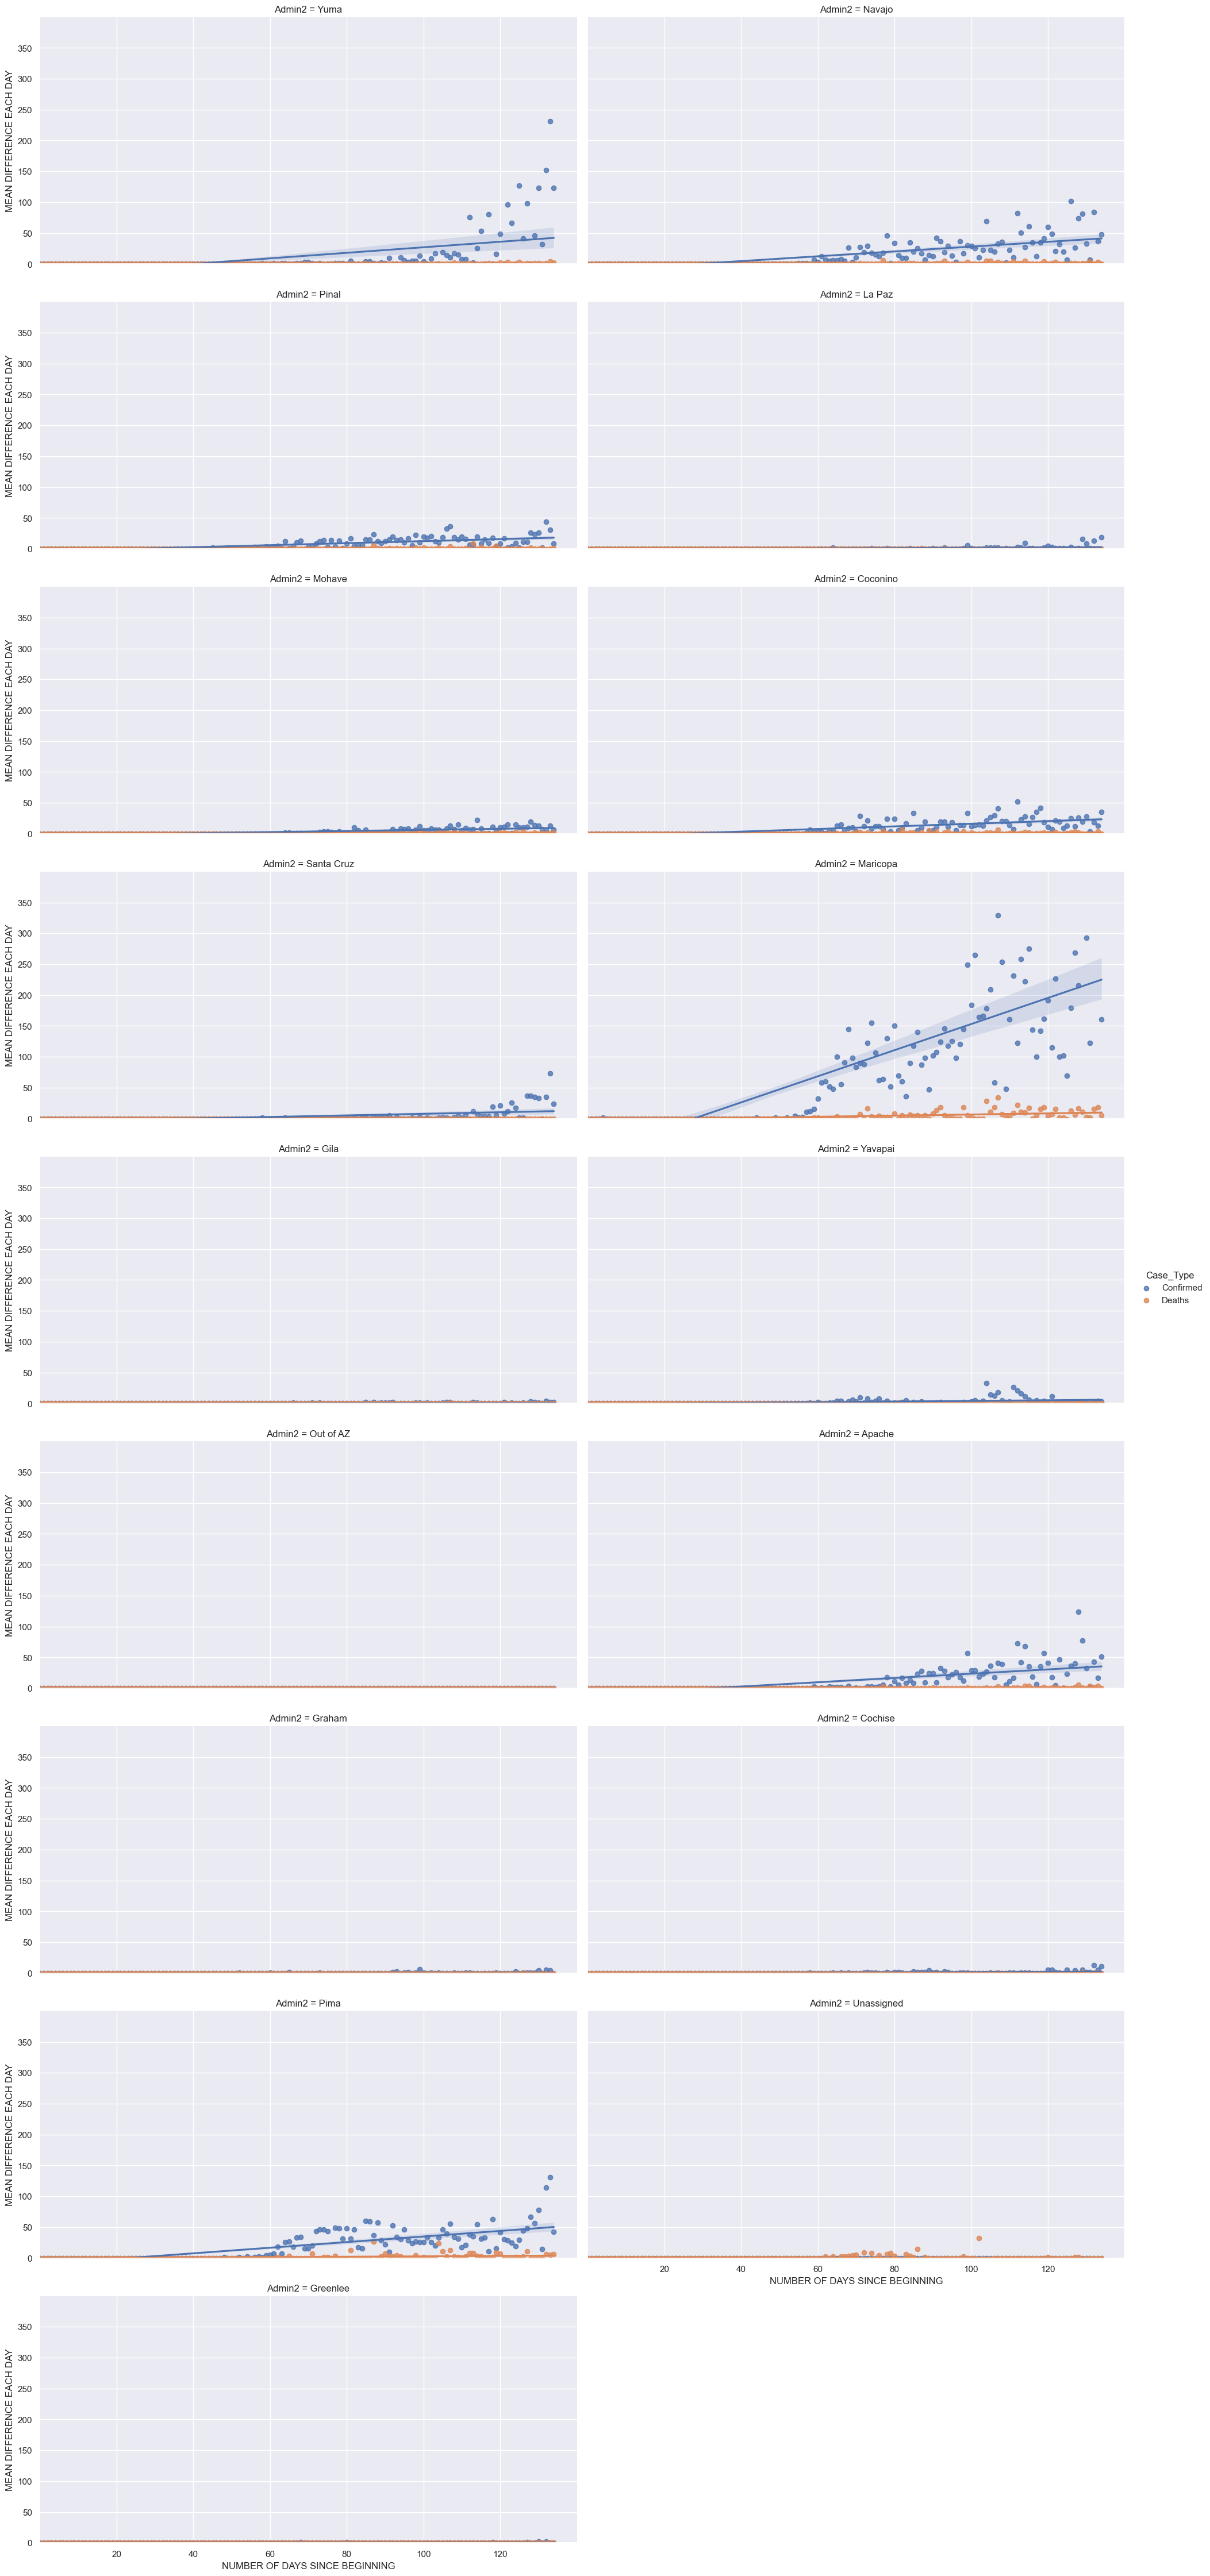

In [29]:
covid_state = covid_df.loc[(covid_df['Province_State'] == state_name)]

covid_state['date_delta'] = (covid_state['Date'] - covid_state['Date'].min())  / np.timedelta64(1,'D')

rcParams['figure.figsize'] = 15, 8

sb.set(style="darkgrid")
#ax = sb.lineplot(y=('Difference'), x='Date', hue='Case_Type', hue_order=('Confirmed','Deaths'), linewidth=4, marker='.',ci=95 , markersize=10, data=covid_state)
ax = sb.lmplot(x='date_delta',y='Difference', hue='Case_Type', hue_order=('Confirmed','Deaths'),col='Admin2', col_wrap=2, ci=95 ,aspect=2, data=covid_state)

ax = (ax.set_axis_labels("NUMBER OF DAYS SINCE BEGINNING", "MEAN DIFFERENCE EACH DAY")
      .set(xlim=(0, 140), ylim=(0, 400),
           xticks=[20,40,60,80,100,120], yticks=[0,50,100,150,200,250,300,350])
      .fig.subplots_adjust(wspace=.02))


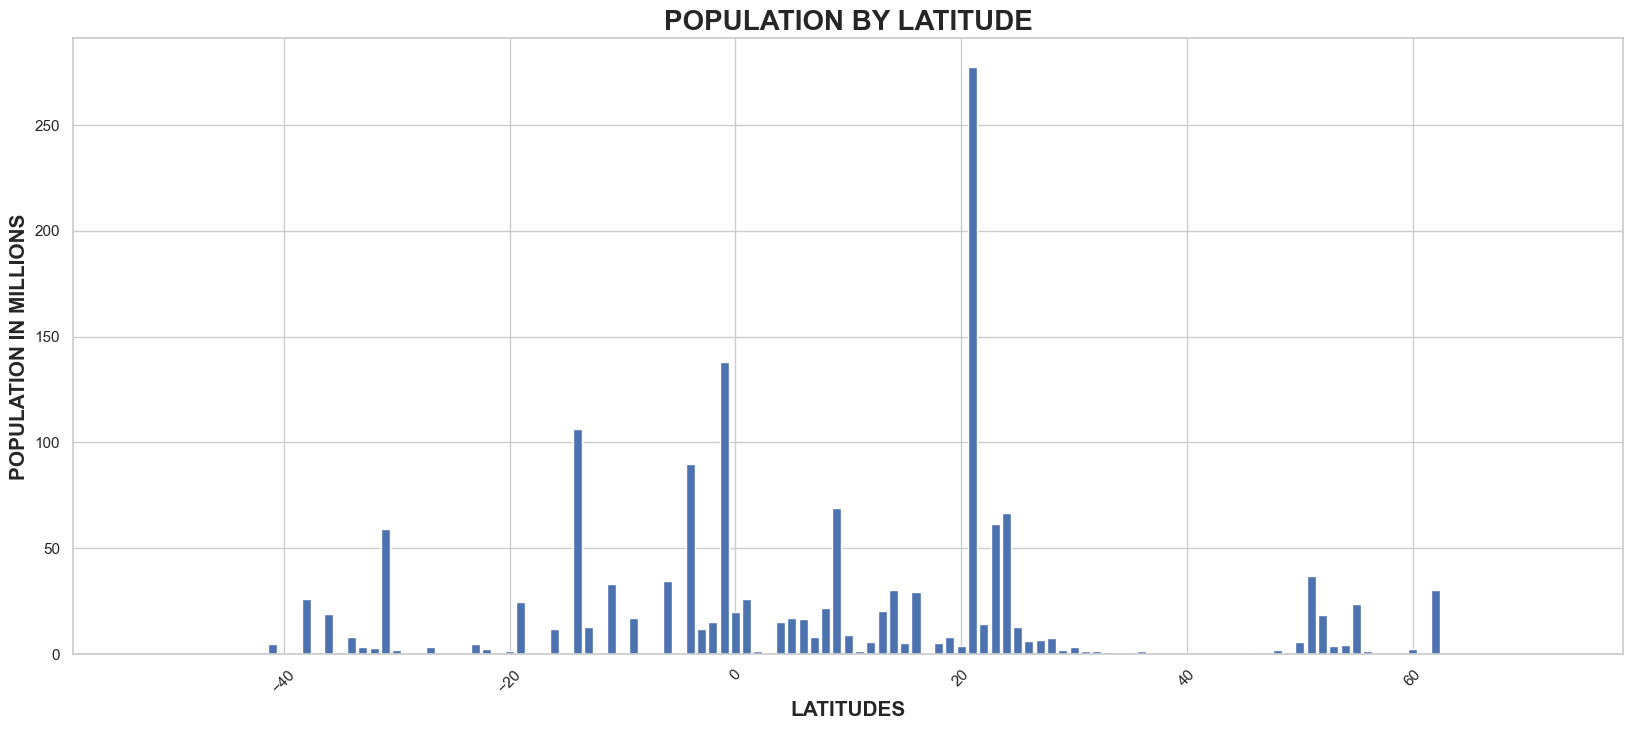

In [30]:
lat_pop = covid_df.groupby(['Lat2'],as_index=False).agg({'Population_Count': ['mean']}).sort_values('Lat2')
#lat_pop = lat_pop.rename(columns={'mean':''}, inplace=False)
lat_pop['per_m'] = lat_pop['Population_Count']/1000000

rcParams['figure.figsize'] = 20, 8

sb.set(style="whitegrid")

plt.bar(lat_pop['Lat2'],lat_pop['per_m'])
plt.xlabel('LATITUDES',fontweight='bold',fontsize=15)
plt.ylabel('POPULATION IN MILLIONS',fontweight='bold',fontsize=15)
plt.title('POPULATION BY LATITUDE',fontweight='bold',fontsize=20)


plt.xticks(rotation=45)
plt.show()


In [51]:
round(40.58)

41

In [31]:
covid_bylat = covid_df.loc[(covid_df['Country_Region'] == country_name)]

#covid_bylat = covid_bylat.loc[(covid_bylat['Province_State'] == 'Arizona') & (covid_bylat['Lat2'] == 33)].groupby(['Lat2','Province_State', 'Case_Type'],
covid_bylat = covid_bylat.loc[(covid_bylat['Province_State'] == 'Arizona')].groupby(['Lat2','Province_State', 'Case_Type'],
#covid_bylat = covid_bylat.groupby(['Lat2','Province_State', 'Case_Type'],
            as_index=False).agg({'Difference': ['sum'],'Population_Count': ['sum']}).sort_values(['Province_State','Lat2'])

covid_bylat = covid_bylat.rename(columns={'sum':''}, inplace=False)

covid_bylat['per_100k'] = covid_bylat['Difference']/(covid_bylat['Population_Count']/100000)
covid_bylat['percent_risk'] = (covid_bylat['per_100k']/100000)*100

covid_bylat[['Province_State','Lat2','Case_Type','per_100k','percent_risk']].sort_values(['Province_State','Lat2']).loc[(covid_bylat['Case_Type'] == 'Confirmed')]

,Province_State,Lat2,Case_Type,per_100k,percent_risk
,,,,,
0,Arizona,32.0,Confirmed,1.965269,0.001965
2,Arizona,33.0,Confirmed,1.971300,0.001971
4,Arizona,34.0,Confirmed,1.469137,0.001469
6,Arizona,35.0,Confirmed,7.065140,0.007065
8,Arizona,36.0,Confirmed,3.434437,0.003434


In [32]:
covid_usa = covid_df.loc[(covid_df['Country_Region'] == country_name)].groupby(['Case_Type'],
            as_index=False).agg({'Difference': ['sum'],'Population_Count': ['sum']})

covid_usa = covid_usa.rename(columns={'sum':''}, inplace=False)

covid_usa['per_100k'] = covid_usa['Difference']/(covid_usa['Population_Count']/100000)
covid_usa['percent_risk'] = (covid_usa['per_100k']/100000)*100

covid_usa[['Case_Type','per_100k','percent_risk']]

,Case_Type,per_100k,percent_risk
,,,
0,Confirmed,4.083490,0.004083
1,Deaths,0.235976,0.000236


In [33]:
covid_bycounty = covid_df.loc[(covid_df['Country_Region'] == country_name)]

#covid_bycounty = covid_bycounty.loc[(covid_bycounty['Province_State'] == 'Arizona') & (covid_bycounty['Lat2'] == 33)].groupby(['Lat2','Province_State', 'Case_Type'],
covid_bycounty = covid_bycounty.loc[(covid_bycounty['Province_State'] == 'Arizona')].groupby(['Admin2','Province_State', 'Case_Type'],
            as_index=False).agg({'Difference': ['sum'],'Population_Count': ['sum']}).sort_values(['Province_State','Admin2'])

covid_bycounty = covid_bycounty.rename(columns={'sum':''}, inplace=False)

covid_bycounty['per_100k'] = covid_bycounty['Difference']/(covid_bycounty['Population_Count']/100000)
covid_bycounty['percent_risk'] = (covid_bycounty['per_100k']/100000)*100

#covid_bycounty[['Province_State','Admin2','Case_Type','per_100k','percent_risk']].sort_values(['per_100k']).loc[(covid_bycounty['Case_Type'] == 'Deaths') & (covid_bycounty['per_100k'] > .00000)]
covid_bycounty[['Province_State','Admin2','Case_Type','per_100k','percent_risk']].sort_values(['per_100k']).loc[(covid_bycounty['Case_Type'] == 'Deaths')]
#covid_bycounty[['Province_State','Admin2','Case_Type','per_100k','percent_risk']].sort_values(['per_100k']).loc[(covid_bycounty['Admin2'] == 'Travis')]
#covid_bycounty[['Province_State','Admin2','Case_Type','per_100k','percent_risk']].sort_values(['Province_State','Admin2']).loc[(covid_bycounty['Case_Type'] == 'Confirmed')]

,Province_State,Admin2,Case_Type,per_100k,percent_risk
,,,,,
27,Arizona,Santa Cruz,Deaths,0.000000,0.000000
11,Arizona,Greenlee,Deaths,0.000000,0.000000
7,Arizona,Gila,Deaths,0.013713,0.000014
31,Arizona,Yavapai,Deaths,0.018905,0.000019
9,Arizona,Graham,Deaths,0.019073,0.000019
3,Arizona,Cochise,Deaths,0.029413,0.000029
13,Arizona,La Paz,Deaths,0.035093,0.000035
25,Arizona,Pinal,Deaths,0.064024,0.000064
15,Arizona,Maricopa,Deaths,0.077783,0.000078


In [34]:
covid_bydatelat = covid_bydate.groupby(['Lat2', 'Date', 'Case_Type'],
            as_index=False).agg({'Difference': ['sum'],'Population_Count': ['sum']}).sort_values('Lat2')

covid_bydatelat = covid_bydatelat.rename(columns={'sum':''}, inplace=False)

covid_bydatelat['per_100k'] = covid_bydatelat['Difference']/(covid_bydatelat['Population_Count']/100000)

print(covid_bydatelat[4750:7000])

      Lat2       Date  Case_Type Difference Population_Count per_100k
                                                                     
4648  35.0 2020-02-20  Confirmed          0       17456199.0      0.0
4649  35.0 2020-02-20     Deaths          0       17456199.0      0.0
4650  35.0 2020-02-21  Confirmed          0       17456199.0      0.0
4651  35.0 2020-02-21     Deaths          0       17456199.0      0.0
4652  35.0 2020-02-22  Confirmed          0       17456199.0      0.0
...    ...        ...        ...        ...              ...      ...
6824  43.0 2020-02-28  Confirmed          0       17263053.0      0.0
6825  43.0 2020-02-28     Deaths          0       17263053.0      0.0
6826  43.0 2020-02-29  Confirmed          0       17263053.0      0.0
6828  43.0 2020-03-01  Confirmed          0       17263053.0      0.0
6829  43.0 2020-03-01     Deaths          0       17263053.0      0.0

[2250 rows x 6 columns]


In [35]:
covid_bydatelat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12420 entries, 0 to 12419
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   (Lat2, )              12420 non-null  float64       
 1   (Date, )              12420 non-null  datetime64[ns]
 2   (Case_Type, )         12420 non-null  object        
 3   (Difference, )        12420 non-null  int64         
 4   (Population_Count, )  12420 non-null  float64       
 5   (per_100k, )          12420 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 679.2+ KB


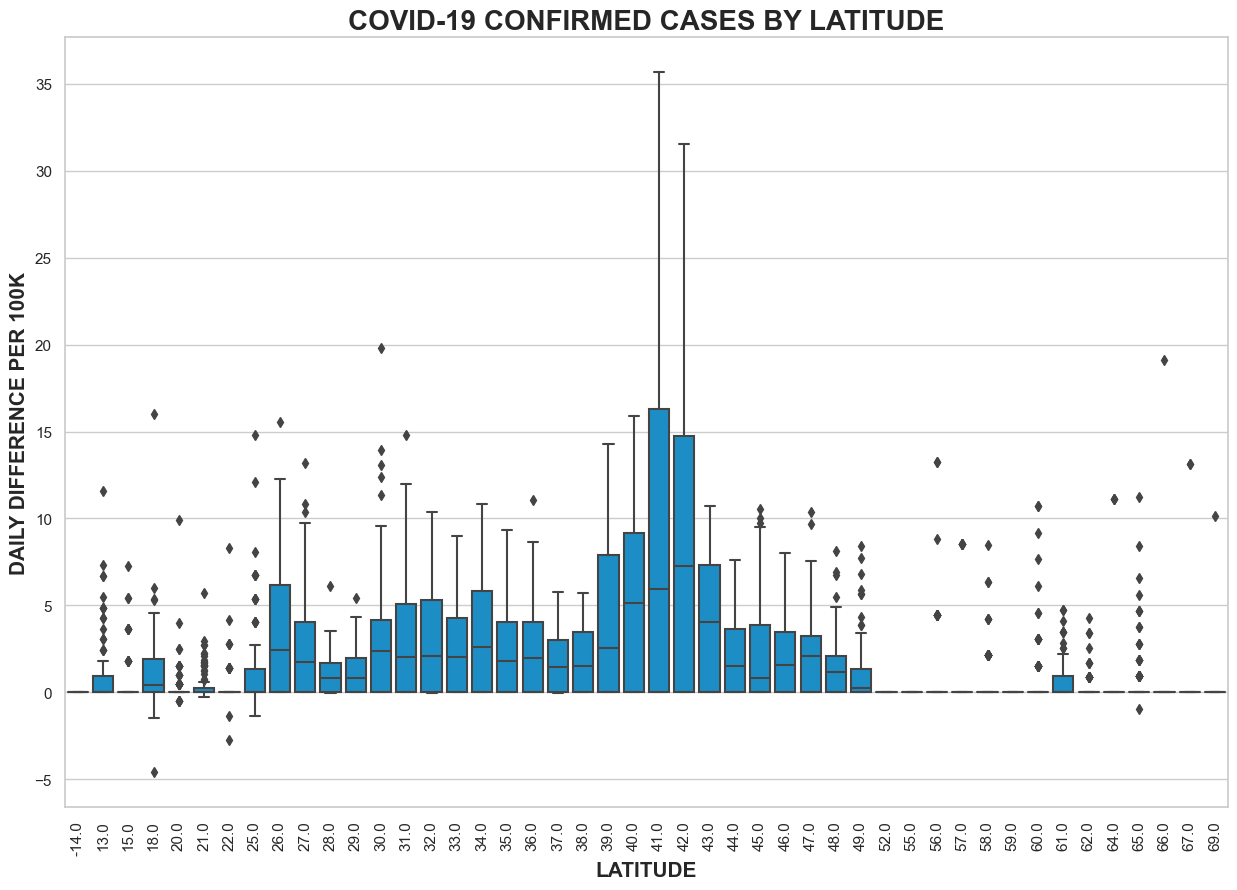

In [37]:
rcParams['figure.figsize'] = 15, 10

sb.set(style="whitegrid")

ax = sb.boxplot(y=('per_100k'), x='Lat2', color='#0198E1', data=covid_bydatelat.loc[(covid_bydatelat['Case_Type'] == 'Confirmed')])
ax.set_title("COVID-19 CONFIRMED CASES BY LATITUDE",fontweight='bold',fontsize=20,position=[.5,1.05])

ax.set_xlabel('LATITUDE',fontweight='bold',fontsize=15)
ax.set_ylabel('DAILY DIFFERENCE PER 100K',fontweight='bold',fontsize=15)

#ax.set_yticks([0,10,20,30,40])#for mean
#ax.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000])#for sum

plt.xticks(rotation=90)
plt.show()

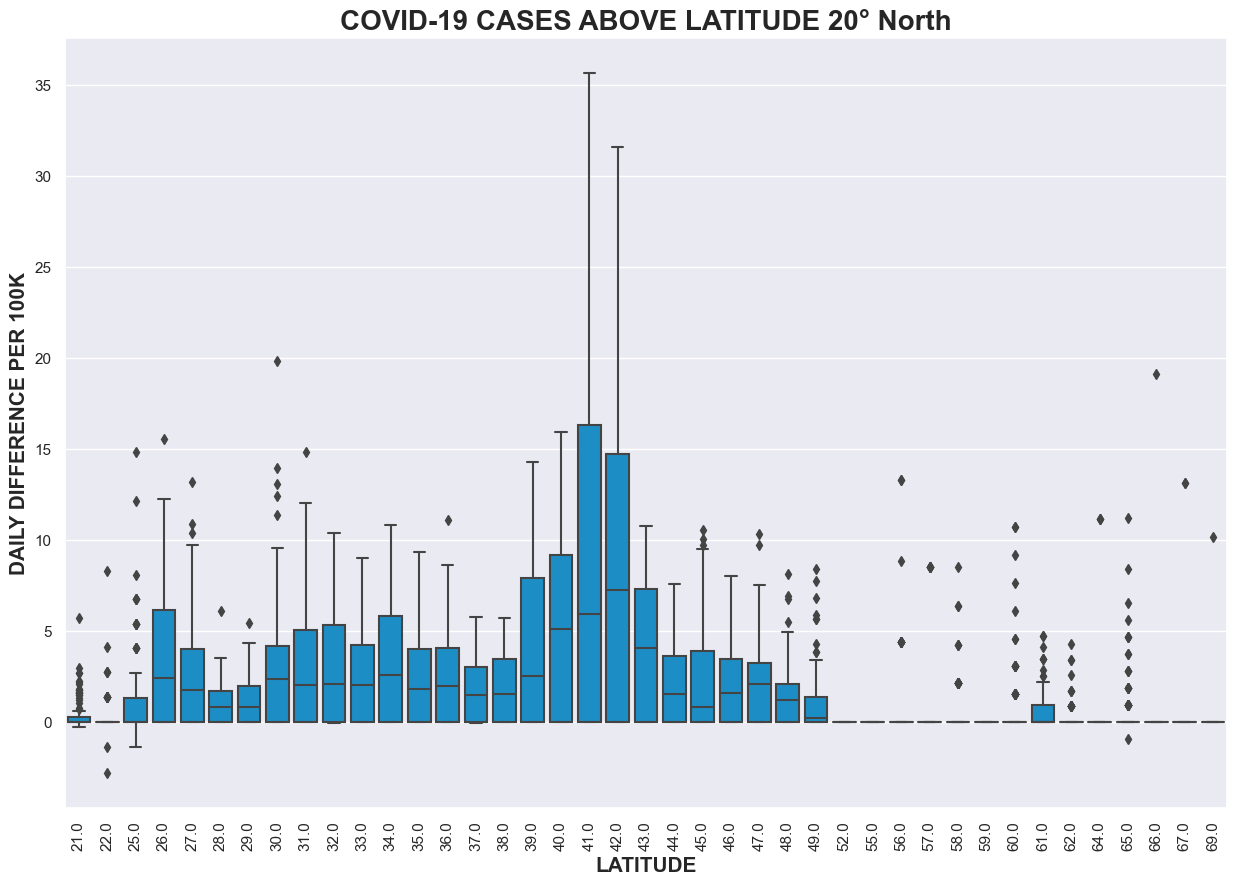

In [38]:
rcParams['figure.figsize'] = 15, 10

sb.set(style="darkgrid")
#ax = sb.lineplot(y=('Difference'), x='Date', hue='Lat2', linewidth=4, marker='.',ci=95 , markersize=10, palette='rainbow', data=covid_bydatelat.loc[(covid_bydatelat['Case_Type'] == 'Deaths')])
#ax = sb.lineplot(y=('Difference'), x='Date', linewidth=4, marker='.',ci=95 , markersize=10, data=covid_df.query("Case_Type == 'Deaths'"))

ax = sb.boxplot(y=('per_100k'), x='Lat2', color='#0198E1', data=covid_bydatelat.loc[(covid_bydatelat['Case_Type'] == 'Confirmed') & (covid_bydatelat['Lat2'] > 20) & (covid_bydatelat['Lat2'] < 100)])
ax.set_title("COVID-19 CASES ABOVE LATITUDE 20° North",fontweight='bold',fontsize=20,position=[.5,1.05])

ax.set_xlabel('LATITUDE',fontweight='bold',fontsize=15)
ax.set_ylabel('DAILY DIFFERENCE PER 100K',fontweight='bold',fontsize=15)

#ax.set_yticks([0,10,20,30,40])#for mean
#ax.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000])#for sum

plt.xticks(rotation=90)
plt.show()


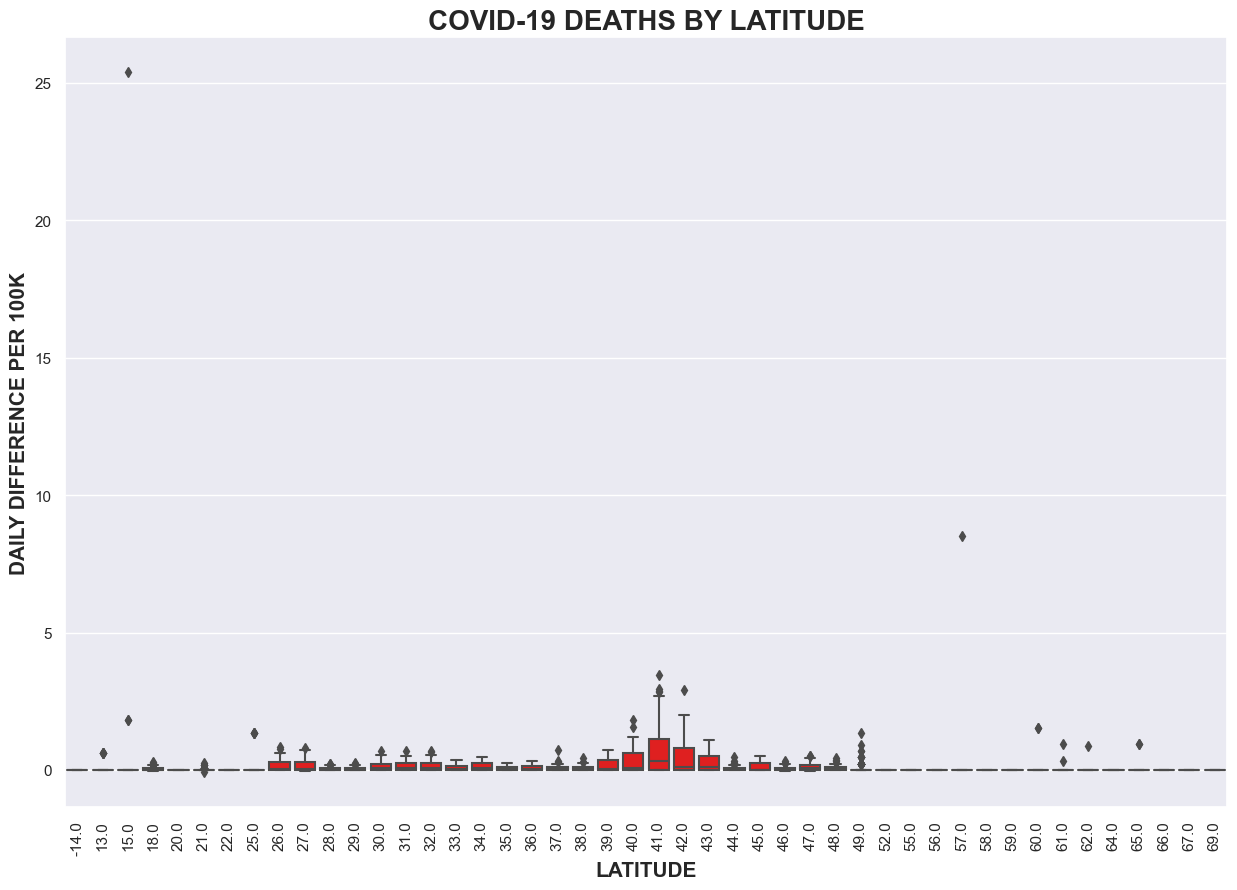

In [39]:
rcParams['figure.figsize'] = 15, 10

sb.set(style="darkgrid")

ax = sb.boxplot(y=('per_100k'), x='Lat2', color='#FF0000', data=covid_bydatelat.loc[(covid_bydatelat['Case_Type'] == 'Deaths')])
ax.set_title("COVID-19 DEATHS BY LATITUDE",fontweight='bold',fontsize=20,position=[.5,1.05])

ax.set_xlabel('LATITUDE',fontweight='bold',fontsize=15)
ax.set_ylabel('DAILY DIFFERENCE PER 100K',fontweight='bold',fontsize=15)

#ax.set_yticks([0,10,20,30,40])#for mean
#ax.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000])#for sum

plt.xticks(rotation=90)
plt.show()

In [40]:
covid_bydate = covid_bydate.groupby(['Date', 'Case_Type'], as_index=False).agg({'Cases': ['sum']})

covid_bydate

,Date,Case_Type,Cases
,,,sum
0,2020-01-22,Confirmed,1
1,2020-01-22,Deaths,0
2,2020-01-23,Confirmed,1
3,2020-01-23,Deaths,0
4,2020-01-24,Confirmed,2
5,2020-01-24,Deaths,0
6,2020-01-25,Confirmed,2
7,2020-01-25,Deaths,0
8,2020-01-26,Confirmed,5


In [41]:
covid_bydate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   (Date, )       270 non-null    datetime64[ns]
 1   (Case_Type, )  270 non-null    object        
 2   (Cases, sum)   270 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.5+ KB


In [50]:
#Need covid_run for chart(s) below
covid_run = pd.pivot_table(covid_df.loc[(covid_df['Province_State'] == state_name) 
#covid_run = pd.pivot_table(covid_df.loc[(covid_df['Country_Region'] == country_name) 
                        & (covid_df['Province_State'] == state_name)
                        & (covid_df['Date'] >= '1/22/2020') & (covid_df['Date'] <= '5/16/2020')],
                        values=['Cases'], index=['Date'], 
                        columns=['Case_Type'], aggfunc='sum')#.assign(**covid_run.index.to_frame())

covid_run.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2020-01-22 to 2020-05-16
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   (Cases, Confirmed)  116 non-null    int64
 1   (Cases, Deaths)     116 non-null    int64
dtypes: int64(2)
memory usage: 2.7 KB


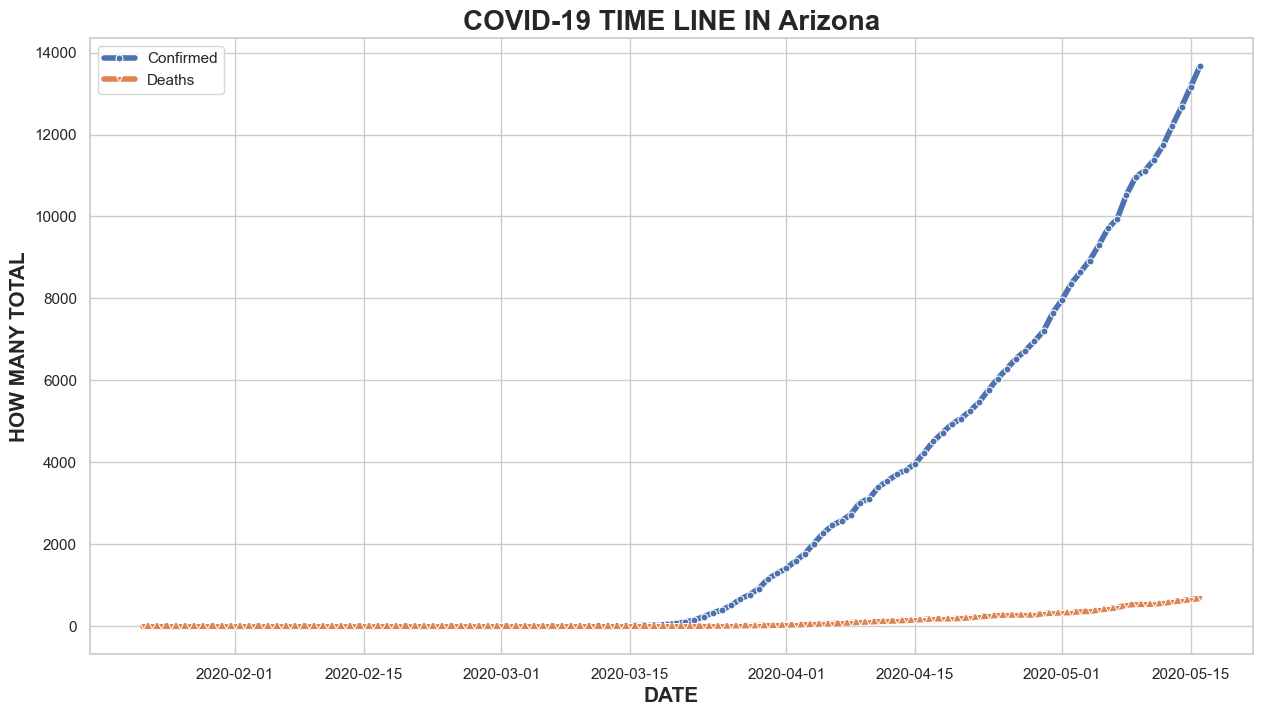

In [53]:
rcParams['figure.figsize'] = 15, 8
sb.set_style('whitegrid')
ax = sb.lineplot(y=('Cases', 'Confirmed'), x='Date', label='Confirmed', linewidth=4, marker='o', markersize=5, data=covid_run)
ax = sb.lineplot(y=('Cases', 'Deaths'), x='Date', label='Deaths', linewidth=4, marker='v', markersize=5, data=covid_run)

ax.set_title(f"COVID-19 TIME LINE IN {state_name}",fontweight='bold',fontsize=20,position=[.5,1.05])
#ax.set_xticklabels('Date', rotation = 45)
ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
ax.set_ylabel('HOW MANY TOTAL',fontweight='bold',fontsize=15)
plt.show()

In [54]:
#Need covid_diff for graph(s) below
covid_diff = pd.pivot_table(covid_df.loc[(covid_df['Province_State'] == state_name)
                        & (covid_df['Admin2'] == county_name)
                        & (covid_df['Date'] >= '1/1/2020')],
                        values=['Difference'], index=['Date'], 
                        columns=['Case_Type'], aggfunc='sum')

covid_diff.assign(**covid_diff.index.to_frame())

print('***Data for', state_name,'/', county_name,'***')
covid_diff


***Data for Arizona / Maricopa ***


Difference       
Case_Type   Confirmed Deaths
Date                        
2020-01-22          0      0
2020-01-23          0      0
2020-01-24          0      0
2020-01-25          0      0
2020-01-26          1      0
2020-01-27          0      0
2020-01-28          0      0
2020-01-29          0      0
2020-01-30          0      0
2020-01-31          0      0
2020-02-01          0      0
2020-02-02          0      0
2020-02-03          0      0
2020-02-04          0      0
2020-02-05          0      0
2020-02-06          0      0
2020-02-07          0      0
2020-02-08          0      0
2020-02-09          0      0
2020-02-10          0      0
2020-02-11          0      0
2020-02-12          0      0
2020-02-13          0      0
2020-02-14          0      0
2020-02-15          0      0
2020-02-16          0      0
2020-02-17          0      0
2020-02-18          0      0
2020-02-19          0      0
2020-02-20          0      0
2020-02-21          0      0
2020-02-22          0      0
2020-02-23          0      0
2020-02-24          0      0
2020-02-25          0      0
2020-02-26          0      0
2020-02-27          0      0
2020-02-28          0      0
2020-02-29          0      0
2020-03-01          0      0
2020-03-02          0      0
2020-03-03          0      0
2020-03-04          0      0
2020-03-05          0      0
2020-03-06          1      0
2020-03-07          0      0
2020-03-08          0      0
2020-03-09          0      0
2020-03-10          0      0
2020-03-11          1      0
2020-03-12          0      0
2020-03-13          0      0
2020-03-14          1      0
2020-03-15          0      0
2020-03-16          4      0
2020-03-17          1      0
2020-03-18          2      0
2020-03-19         11      0
2020-03-20         12      0
2020-03-21         15      1
2020-03-22         32      1
2020-03-23         58      0
2020-03-24         60      0
2020-03-25         52      0
2020-03-26         48      0
2020-03-27        100      3
2020-03-28         55      0
2020-03-29         91      0
2020-03-30        145      0
2020-03-31         98      0
2020-04-01         83      0
2020-04-02         90      7
2020-04-03         88      0
2020-04-04        122     16
2020-04-05        155      3
2020-04-06        107      0
2020-04-07         62      4
2020-04-08         64      2
2020-04-09        130      2
2020-04-10         52      0
2020-04-11        150      8
2020-04-12         69      0
2020-04-13         60      5
2020-04-14         36      2
2020-04-15         90      6
2020-04-16        118      4
2020-04-17        140      5
2020-04-18         87      1
2020-04-19         98      5
2020-04-20         47      0
2020-04-21        102      8
2020-04-22        108     14
2020-04-23        124     18
2020-04-24        146      5
2020-04-25        118      1
2020-04-26        125      1
2020-04-27         98      0
2020-04-28        121      0
2020-04-29        145     18
2020-04-30        249      5
2020-05-01        184      2
2020-05-02        265      0
2020-05-03        164      0
2020-05-04        166      0
2020-05-05        178     28
2020-05-06        209     11
2020-05-07         58     18
2020-05-08        329     34
2020-05-09        254      7
2020-05-10         48      2
2020-05-11        161      3
2020-05-12        231      9
2020-05-13        122     22
2020-05-14        258     11
2020-05-15        222     10
2020-05-16        275     17
2020-05-17        144      0
2020-05-18        100      5
2020-05-19        142     15
2020-05-20        162     18
2020-05-21        191      4
2020-05-22        115      7
2020-05-23        227     15
2020-05-24        100      1
2020-05-25        102      1
2020-05-26         69     -1
2020-05-27        179     13
2020-05-28        269      6
2020-05-29        216     16
2020-05-30        410     11
2020-05-31        293      2
2020-06-01        122      1
2020-06-02        599     15
2020-06-03        532     18
2020-06-04        161      5

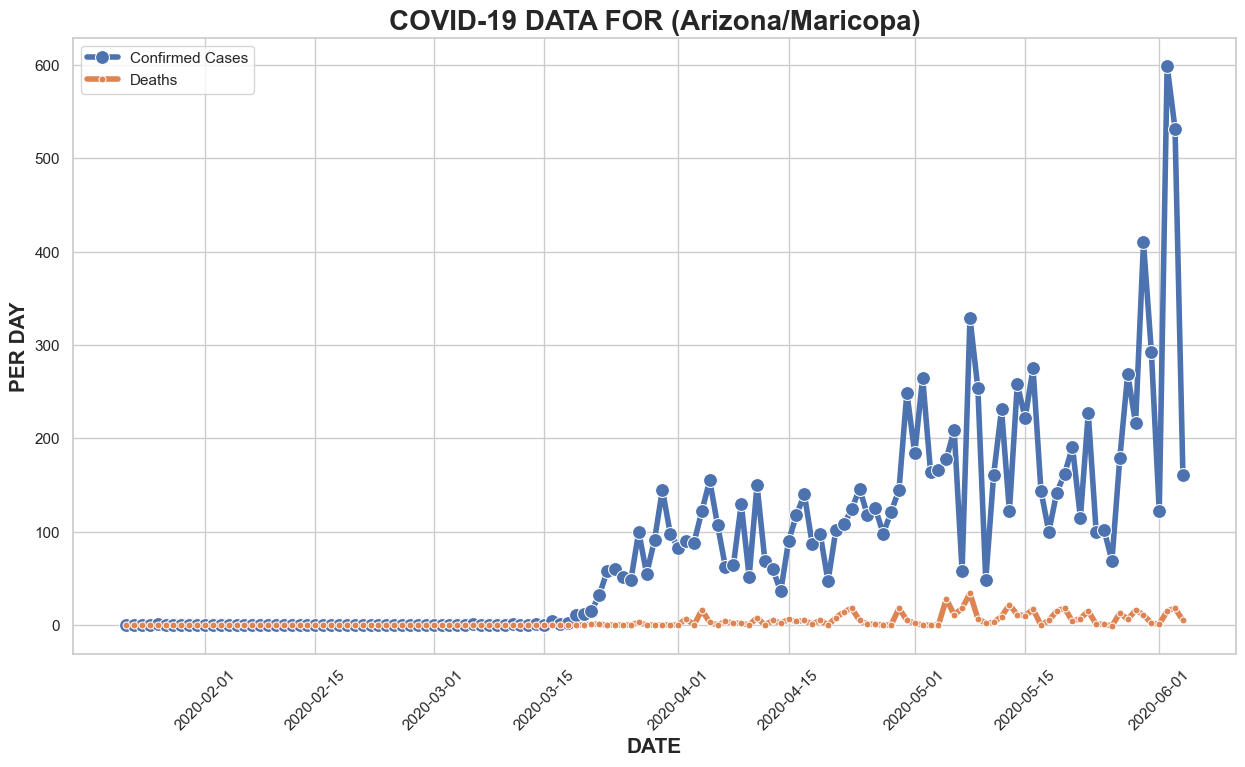

In [56]:
#Run covid_diff first
# ************************************************
rcParams['figure.figsize'] = 15, 8
sb.set_style('whitegrid')
ax = sb.lineplot(y=('Difference', 'Confirmed'), x='Date', label='Confirmed Cases', linewidth=4, marker='o', markersize=10, data=covid_diff)
ax = sb.lineplot(y=('Difference', 'Deaths'), x='Date', label='Deaths', linewidth=4, marker='.', markersize=10, data=covid_diff)
#ax = sb.lineplot(y=('Difference', 'Deaths'), x='Date', hue='Province_State', linewidth=4, marker='.', markersize=10, data=covid_diff)

ax.set_title(f"COVID-19 DATA FOR ({state_name}/{county_name})",fontweight='bold',fontsize=20,position=[.5,1.05])

plt.xticks(rotation=45)
ax.set_xlabel('DATE',fontweight='bold',fontsize=15)
ax.set_ylabel('PER DAY',fontweight='bold',fontsize=15)
plt.show()

In [57]:
covid_df

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country_Region,Province_State,Admin2,iso2,...,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,100k_quotient,per_ht,Lat2
0,Confirmed,NaN,6,0,2020-05-22,Western Sahara,Western Sahara,NaN,NaN,EH,...,NaN,24.215500,-12.885800,597330.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,5.97330,0.0,24.0
1,Confirmed,NaN,0,0,2020-02-03,Switzerland,Switzerland,NaN,NaN,CH,...,NaN,46.818200,8.227500,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,86.54618,0.0,47.0
2,Deaths,NaN,0,0,2020-03-01,Cyprus,Cyprus,NaN,NaN,CY,...,NaN,35.126400,33.429900,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,12.07361,0.0,35.0
3,Confirmed,NaN,23,0,2020-04-21,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,...,NaN,17.060800,-61.796400,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,0.97928,0.0,17.0
4,Deaths,NaN,56,0,2020-05-11,Thailand,Thailand,NaN,NaN,TH,...,NaN,15.870032,100.992541,69799978.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,697.99978,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950665,Deaths,NaN,0,0,2020-01-22,"Missoula, Montana, US",US,Montana,Missoula,US,...,30063.0,47.037286,-113.921351,119600.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,1.19600,0.0,47.0
950666,Confirmed,NaN,0,0,2020-01-22,"Ontonagon, Michigan, US",US,Michigan,Ontonagon,US,...,26131.0,46.665226,-89.313905,5720.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,0.05720,0.0,47.0
950667,Deaths,NaN,0,0,2020-01-22,"Sargent, North Dakota, US",US,North Dakota,Sargent,US,...,38081.0,46.108304,-97.632172,3898.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,0.03898,0.0,46.0
950668,Confirmed,NaN,0,0,2020-01-22,"Ohio, Kentucky, US",US,Kentucky,Ohio,US,...,21183.0,37.477518,-86.853681,23994.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,6/4/2020 11:15:39 PM,0.23994,0.0,37.0


In [58]:
#covid_world_totals = pd.pivot_table(covid_df, values=['Cases'], columns=['Case_Type'], index=['Date'], aggfunc='sum') #Daily Totals
covid_world_totals = pd.pivot_table(covid_df, values=['Difference'], columns=['Case_Type'], aggfunc='sum')
#covid_world_totals = covid_world_totals.rename(columns={'Cases','Confirmed':'Confirmed'}, inplace=False)
covid_world_totals.columns = covid_world_totals.columns.get_level_values(0)

covid_world_totals['%_Confirmed'] = covid_world_totals['Deaths']/covid_world_totals['Confirmed']*100
covid_world_totals['%_World_Population'] = covid_world_totals['Deaths']/7785000000*100

covid_world_totals

Case_Type,Confirmed,Deaths,%_Confirmed,%_World_Population
Difference,6632833,391133,5.896922,0.005024
